# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.178825e+01     8.500792e+00
 * time: 0.001992940902709961
     1     2.833646e+01     4.173958e+00
 * time: 0.008296012878417969
     2     1.839302e+01     3.709776e+00
 * time: 0.01532602310180664
     3     1.211499e+01     2.620330e+00
 * time: 0.02234196662902832
     4     1.074522e+01     1.957059e+00
 * time: 0.028529882431030273
     5     9.927234e+00     1.695633e+00
 * time: 0.06327295303344727
     6     9.417130e+00     1.143915e+00
 * time: 0.06755685806274414
     7     8.951385e+00     1.003855e+00
 * time: 0.07131791114807129
     8     8.450545e+00     7.320735e-01
 * time: 0.07507491111755371
     9     8.171018e+00     6.378751e-01
 * time: 0.07936501502990723
    10     8.016306e+00     5.069391e-01
 * time: 0.08362102508544922
    11     7.946976e+00     4.391262e-01
 * time: 0.08931279182434082
    12     7.903233e+00     3.830726e-01
 * time: 0.09544897079467773
    13     7.867426e+00     3.639846e-01
 * ti

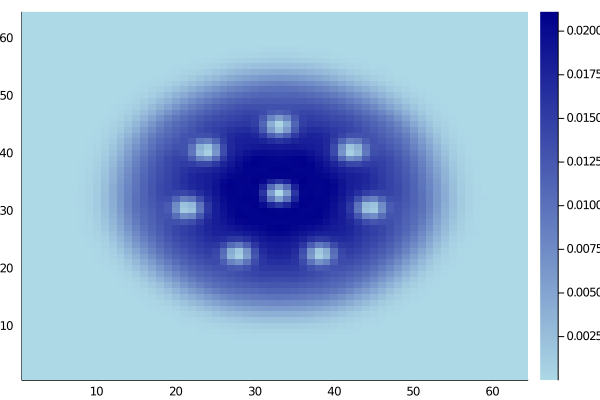

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)